# Linear Regression and Neural Networks

## Step 1: Generate Random Data

1. Select a distribution of your choice with two parameters (e.g., Gaussian distribution with mean μ and variance σ2).
2. Generate random data points for x ∈ R and corresponding y values using a simple linear relationship:

$$y = ax + b + ε$$

where a and b are constants, and ε is some noise added to the data (sampled from your chosen distribution).

Tasks:

• Choose your distribution and specify the parameters.

• Generate at least 100 data points.

• Plot the data points on a 2D scatter plot.

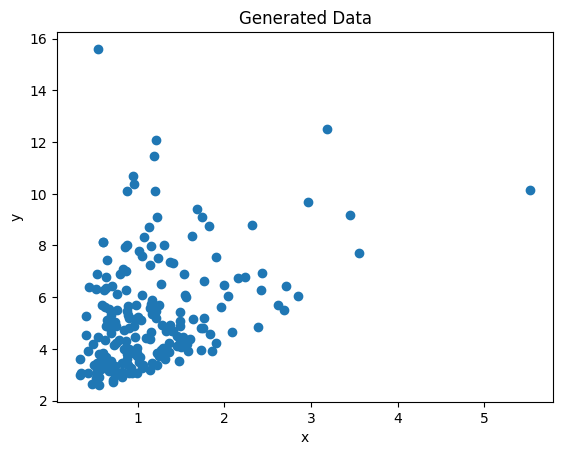

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define parameters for the lognormal distribution
mean = 0
std_dev = 0.5
n_points = 200

# Generate random data for x and y
x = np.random.lognormal( mean, std_dev, n_points) # https://numpy.org/doc/2.1/reference/random/generated/numpy.random.lognormal.html
# This generates a log normal distribution

a = 1 # slope
b = 2 # intercept
epsilon = np.random.exponential(2, n_points) #noise
# This generates a exponential distribution
y = a*x + b + epsilon
# Now we will create our y value from our x which is lognormally distributed with some noise which is exponetially distributed

# Plot the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

## Step 2: Perform Linear Regression Without Neural Networks

1. Use a standard linear regression model to fit the data:

$$y = ax + b$$

2. Train the model and report the learned parameters a (slope) and b (intercept).

3. Plot the predicted line of best fit over the scatter plot of the data.

Tasks:

• Fit a linear regression model to the data.

• Plot the regression line.

• Comment on the mathematical operations used (e.g., computing the best fit line).

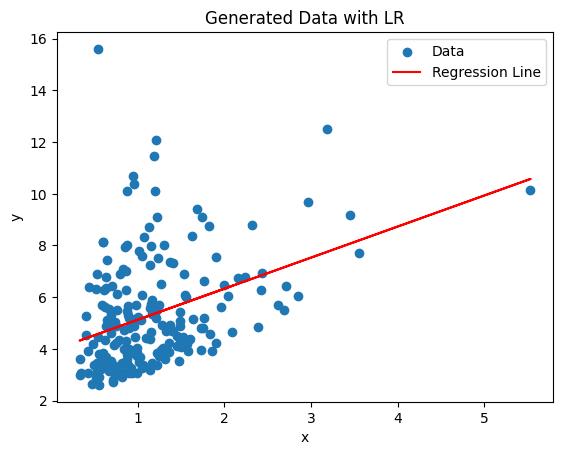

In [2]:
from sklearn.linear_model import LinearRegression

# Reshape data for scikit-learn
x_reshaped = x.reshape(-1, 1)

# Fit the linear regression model
linear_model = LinearRegression()
# This linear model tries to decreses the sum of the squares of the cartassian distance between the original point and predicted point  
linear_model.fit(x_reshaped, y)

# Get the predicted y values
y_pred = linear_model.predict(x_reshaped)

# PLot the data and regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with LR')
plt.legend()
plt.show()

# Step 3: Perform Linear Regression Using a Neural Network (Single Dense Layer)

1. Build a neural network with a single dense layer to perform the same linear regression.

2. The architecture should have 1 input, 1 output, and no activation function (i.e., just a linear transformation):

$$y = W · x + b$$

3. Train the model and compare the results with your standard linear regression.

Tasks:

• Build a neural network with 1 dense layer.

• Train it using a suitable optimizer and loss function (e.g., mean squared error).

• Plot the predicted line and compare with the linear regression model.

• Explain why the ‘Dense‘ layer works for this task and comment on the loss function used.

Code Hint: Use Keras or PyTorch for building neural networks.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


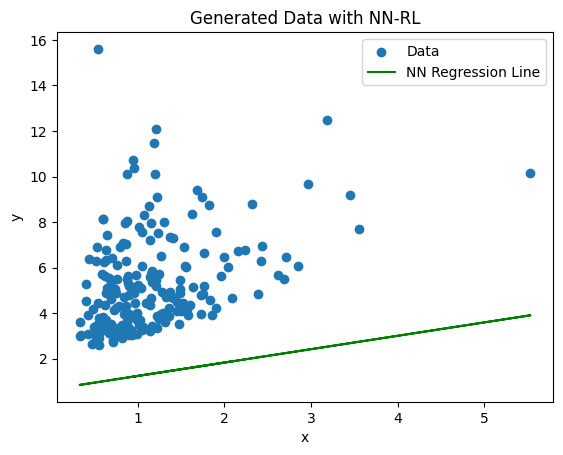

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))  # 1 input, 1 output, no activation function
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# https://github.com/keras-team/keras/blob/v3.3.3/keras/src/layers/core/dense.py#L15-L603
# .add method appends a layer to the model
# Dense is a type of layer which is fully connected to the previous layer, having 1 neuron and 1 input 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# https://stackoverflow.com/questions/47995324/does-model-compile-initialize-all-the-weights-and-biases-in-keras-tensorflow
# Compile function defines the Loss Function, Optimizer, Mertics and etc for the training

# Train the model
model.fit(x, y, epochs=100, verbose=0)
# .fit function trains the model based on the training data

# Get the predicted y values from the NN
y_nn_pred = model.predict(x)
# Predicts the output based on the x values

# Plot the original data and NN regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_nn_pred, color='green', label='NN Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data with NN-RL')
plt.legend()
plt.show()

# Step 4: Experiment with Multiple Layers

1. Build and train a neural network with 1, 2, 3, and 4 dense layers.

2. For each neural network: - The first and last layers should remain the same (input and output layers). - Hidden layers can have activation functions (ReLU, etc.) or be linear transformations.

3. Compare the performance of each neural network model.
Tasks:

• Build neural networks with 1, 2, 3, and 4 layers.

• Train each model and plot the predictions.

• Compare the performance of each model (e.g., using Mean Squared Error) and display the results on a plot.

• Explain how adding layers changes the model’s performance and complexity.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


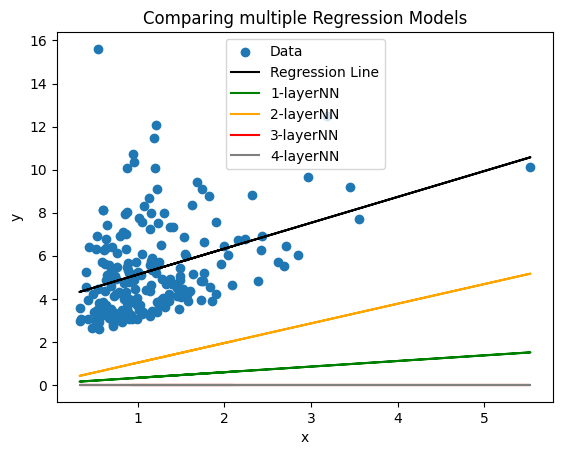

In [4]:
from tensorflow.keras import backend as K
import tensorflow as tf
import keras
optimizer = keras.optimizers.Adam(learning_rate=0.00001)

#Define a neural network with single layer(e.g., 1 layers)
model_1_layers=Sequential()
# We have added one output neuron having an activation function as 'ReLU'.
model_1_layers.add(Dense(1, input_dim=1, activation='relu'))

optimizer_1 = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and train the model
model_1_layers.compile(optimizer=optimizer_1, loss='mean_squared_error')
history_1 = model_1_layers.fit(x, y, epochs=10, verbose=0)

y_nn_1_layers_pred = model_1_layers.predict(x)
#######################################################################################################################################################

#Define a neural network with multiple layers(e.g., 2 layers)
model_2_layers=Sequential()
model_2_layers.add(Dense(2, input_dim=1, activation='relu'))
# We have added one more layer just after the input layer having 2 neurons, and having an activation function as 'ReLU'.
model_2_layers.add(Dense(1, activation='relu'))

optimizer_2 = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and train the model
model_2_layers.compile(optimizer=optimizer_2, loss='mean_squared_error')
history_2 = model_2_layers.fit(x, y, epochs=10, verbose=0)

y_nn_2_layers_pred = model_2_layers.predict(x)
#######################################################################################################################################################

#Define a neural network with multiple layers(e.g., 3 layers)
model_3_layers=Sequential()
model_3_layers.add(Dense(2, input_dim=1, activation='relu'))
model_3_layers.add(Dense(2, activation='relu'))
# We have added two more layer just after the input layer having 2 neurons, and 2 neurons, and having an activation function as 'ReLU'.
model_3_layers.add(Dense(1, activation='relu'))

optimizer_3 = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and train the model
model_3_layers.compile(optimizer=optimizer_3, loss='mean_squared_error')
history_3 = model_3_layers.fit(x, y, epochs=10, verbose=0)

y_nn_3_layers_pred = model_3_layers.predict(x)
#######################################################################################################################################################

#Define a neural network with multiple layers(e.g., 4 layers)
model_4_layers=Sequential()
model_4_layers.add(Dense(2, input_dim=1, activation='relu'))
model_4_layers.add(Dense(4, activation='relu'))
model_4_layers.add(Dense(2, activation='relu'))
# We have added one more layer just after the input layer having 2 neurons, 2 neurons, and 2 neurons and having an activation function as 'ReLU'.
model_4_layers.add(Dense(1, activation='relu'))

optimizer_4 = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile and train the model
model_4_layers.compile(optimizer=optimizer_4, loss='mean_squared_error')
history_4 = model_4_layers.fit(x, y, epochs=10, verbose=0)

y_nn_4_layers_pred = model_4_layers.predict(x)
#######################################################################################################################################################


#Predict and plot
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='black', label='Regression Line')
plt.plot(x, y_nn_1_layers_pred, color='green', label='1-layerNN')
plt.plot(x, y_nn_2_layers_pred, color='orange', label='2-layerNN')
plt.plot(x, y_nn_3_layers_pred, color='red', label='3-layerNN')
plt.plot(x, y_nn_4_layers_pred, color='grey', label='4-layerNN')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing multiple Regression Models')
plt.legend()
plt.show()

# Step 5: Compare and Visualize the Results

1. Compare the linear regression, single dense layer NN, and multi-layer NNs using a plot.

2. Discuss how adding layers affects the performance, both in terms of fitting the data and generalization.

Tasks:

• Plot all models on the same graph to compare their performance.

• Calculate the Mean Squared Error (MSE) for each model and report it.

• Write an explanation comparing the different models, especially in terms of complexity and performance.

Code Hint: Use the mean squared error function

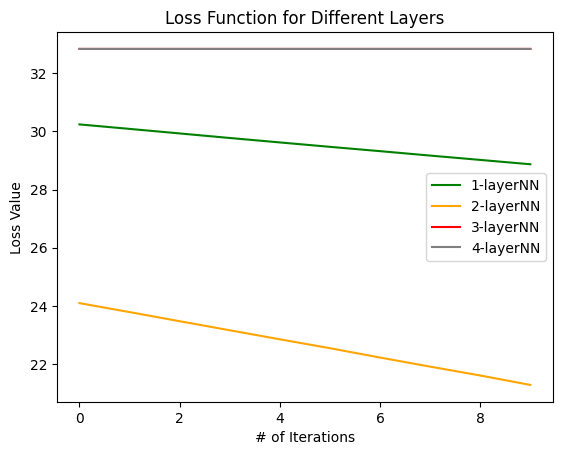

In [5]:
# plt.scatter(x, y, label='Data')
plt.plot(history_1.history['loss'], color='green', label='1-layerNN')
plt.plot(history_2.history['loss'], color='orange', label='2-layerNN')
plt.plot(history_3.history['loss'], color='red', label='3-layerNN')
plt.plot(history_4.history['loss'], color='grey', label='4-layerNN')
plt.title("Loss Function for Different Layers")
plt.xlabel('# of Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
# mean_squared_error calculates the sum of the square of differences of y and y'
mse_linear = mean_squared_error(y, y_pred)
mse_nn_1layers = mean_squared_error(y, y_nn_1_layers_pred)
mse_nn_2layers = mean_squared_error(y, y_nn_2_layers_pred)
mse_nn_3layers = mean_squared_error(y, y_nn_3_layers_pred)
mse_nn_4layers = mean_squared_error(y, y_nn_4_layers_pred)

# Print the results
print(f'MSE (Linear Regression): {mse_linear}')
print(f'MSE (1-Layer NN): {mse_nn_1layers}')
print(f'MSE (2-Layer NN): {mse_nn_2layers}')
print(f'MSE (3-Layer NN): {mse_nn_3layers}')
print(f'MSE (4-Layer NN): {mse_nn_4layers}')

MSE (Linear Regression): 3.9111185502478896
MSE (1-Layer NN): 28.772298843685086
MSE (2-Layer NN): 21.08076767947081
MSE (3-Layer NN): 32.83565808988758
MSE (4-Layer NN): 32.83565808988758
